In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/winequality-red.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


By invoking the `.info()` command on the DataFrame, we can see that there are 6497 entries in the dataset and that there are no missing values. The dataset contains **11** columns filled with **float** values describing the one target column **quality** which holds **int** values.

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

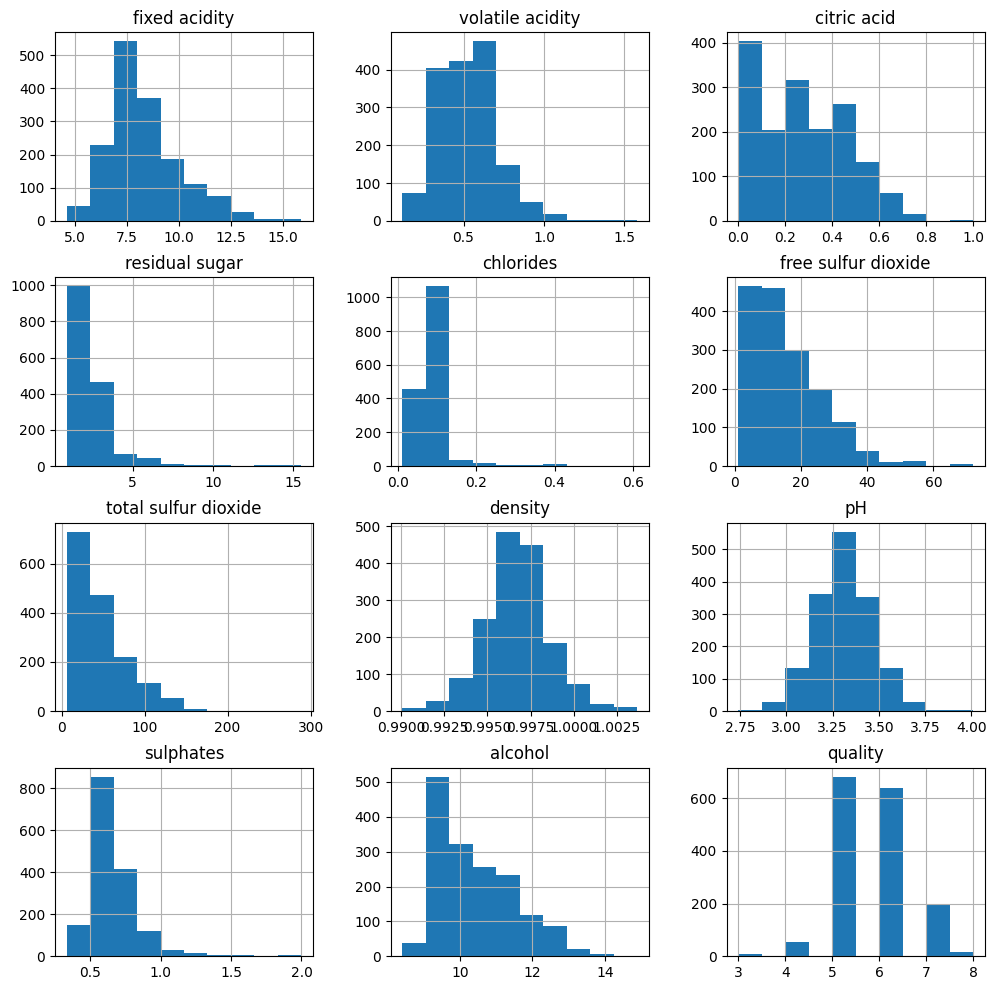

In [4]:
data.hist(figsize=(12, 12))

It can be seen that the values of the **quality** column ranges from 3 to 8 with the majority of the values being 5 and 6.

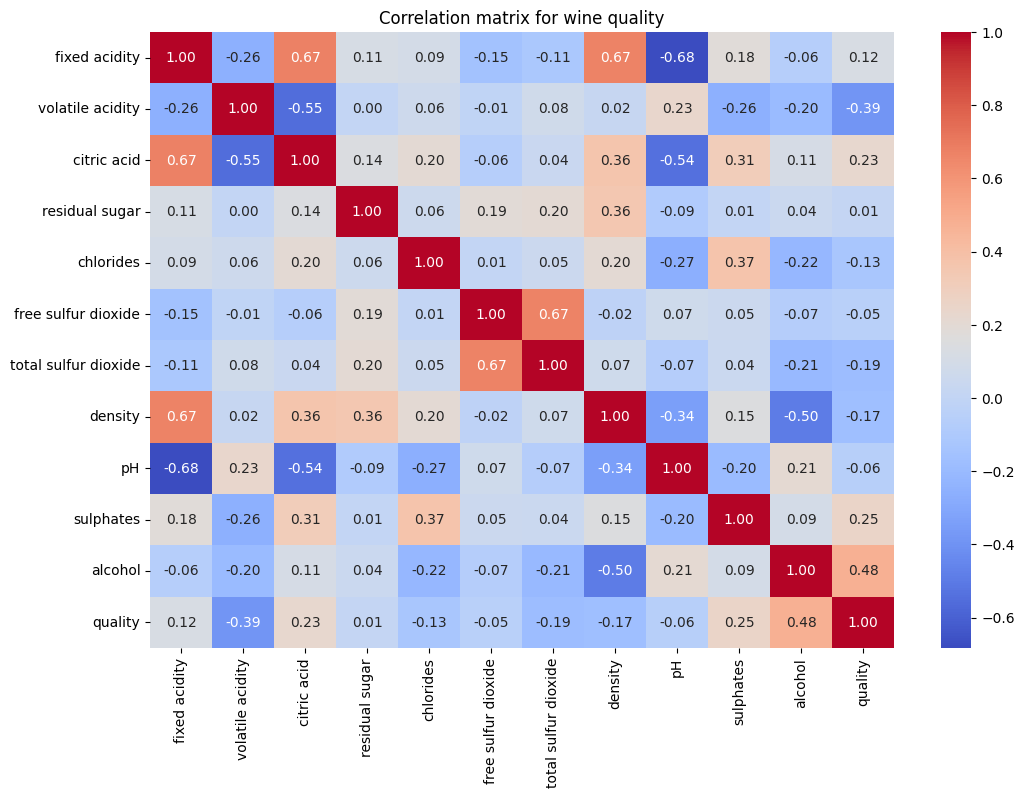

In [5]:
corr_matrix = data.corr()
 
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for wine quality")
plt.show()

By looking at the correlation matrix above, it can be seen that generally speaking the **quality** of the wine is positively correlated with the **alcohol (0.48)** and **sulphates (0.25)** content and (highest) negatively correlated with the **volatile acidity (-0.39)** and **total sulfur dioxide (-0.19)** content.

That means, the **alcohol** as well as the **sulphates** have the biggest impact on the **quality** of the overall wine on the complete range of the quality scale.

In [6]:
data['quality_label'] = data['quality'].apply(lambda value: 'low' if value <= 4 else 'high' if value >= 7 else 'mid')

In [7]:
high_quality_wines = data.loc[data['quality_label'] == 'high']
other_quality_wines = data.loc[data['quality_label'] != 'high']

high_quality_wines = high_quality_wines.drop(['quality', 'quality_label'], axis=1)
other_quality_wines = other_quality_wines.drop(['quality', 'quality_label'], axis=1)

comparison = pd.DataFrame({
    "High Quality Mean": high_quality_wines.mean(),
    "Other Quality Mean": other_quality_wines.mean(),
    "Difference (High - Other)": high_quality_wines.mean() - other_quality_wines.mean()
})

comparison['Percentage Difference (%)'] = (comparison['Difference (High - Other)'] / comparison['Other Quality Mean']) * 100

comparison_sorted = comparison.sort_values(by="Percentage Difference (%)", ascending=False)
comparison_sorted

,High Quality Mean,Other Quality Mean,Difference (High - Other),Percentage Difference (%)
citric acid,0.376498,0.254407,0.122091,47.990505
sulphates,0.743456,0.644754,0.098702,15.308512
alcohol,11.518049,10.251037,1.267012,12.359842
residual sugar,2.708756,2.512120,0.196636,7.827478
fixed acidity,8.847005,8.236831,0.610174,7.407873
density,0.996030,0.996859,-0.000829,-0.083150
pH,3.288802,3.314616,-0.025815,-0.778813
free sulfur dioxide,13.981567,16.172214,-2.190647,-13.545748
chlorides,0.075912,0.089281,-0.013368,-14.973339
volatile acidity,0.405530,0.547022,-0.141492,-25.865937


C:\Users\Marius\AppData\Local\Temp\ipykernel_16112\406839654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=comparison_sorted['Percentage Difference (%)'],


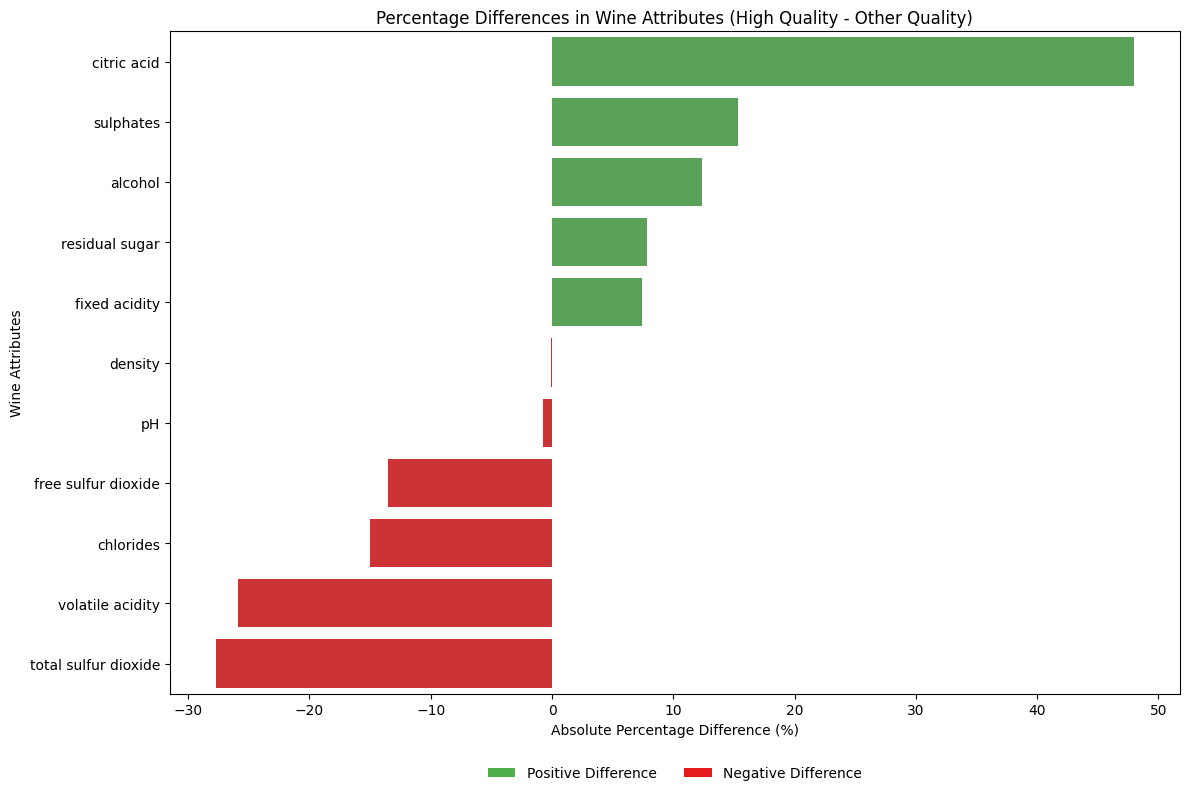

In [8]:
colors = ['#4daf4a' if x > 0 else '#e41a1c' for x in comparison_sorted['Percentage Difference (%)']]

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=comparison_sorted['Percentage Difference (%)'], 
                       y=comparison_sorted.index, 
                       palette=colors)

positive_patch = plt.Rectangle((0,0),1,1,fc="#4daf4a", edgecolor = 'none')
negative_patch = plt.Rectangle((0,0),1,1,fc='#e41a1c', edgecolor = 'none')
l = plt.legend([positive_patch, negative_patch], ['Positive Difference', 'Negative Difference'], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
l.draw_frame(False)

plt.title('Percentage Differences in Wine Attributes (High Quality - Other Quality)')
plt.xlabel('Absolute Percentage Difference (%)')
plt.ylabel('Wine Attributes')
plt.tight_layout()
plt.show()


In [9]:
low_quality_wines = data.loc[data['quality_label'] == 'low']
other_quality_wines = data.loc[data['quality_label'] != 'low']

low_quality_wines = low_quality_wines.drop(['quality', 'quality_label'], axis=1)
other_quality_wines = other_quality_wines.drop(['quality', 'quality_label'], axis=1)

comparison = pd.DataFrame({
    "Low Quality Mean": low_quality_wines.mean(),
    "Other Quality Mean": other_quality_wines.mean(),
    "Difference (Low - Other)": low_quality_wines.mean() - other_quality_wines.mean()
})

comparison['Percentage Difference (%)'] = (comparison['Difference (Low - Other)'] / comparison['Other Quality Mean']) * 100

comparison_sorted = comparison.sort_values(by="Percentage Difference (%)", ascending=False)
comparison_sorted

,Low Quality Mean,Other Quality Mean,Difference (Low - Other),Percentage Difference (%)
volatile acidity,0.724206,0.519766,0.204441,39.333252
chlorides,0.095730,0.087128,0.008603,9.873512
residual sugar,2.684921,2.532812,0.152108,6.005503
pH,3.384127,3.308118,0.076008,2.297635
density,0.996689,0.996749,-0.000060,-0.006052
alcohol,10.215873,10.431478,-0.215605,-2.066868
fixed acidity,7.871429,8.338021,-0.466592,-5.595959
sulphates,0.592222,0.660853,-0.068631,-10.385162
free sulfur dioxide,12.063492,16.031250,-3.967758,-24.750147
total sulfur dioxide,34.444444,46.960938,-12.516493,-26.652988


C:\Users\Marius\AppData\Local\Temp\ipykernel_16112\422300057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=comparison_sorted['Percentage Difference (%)'],


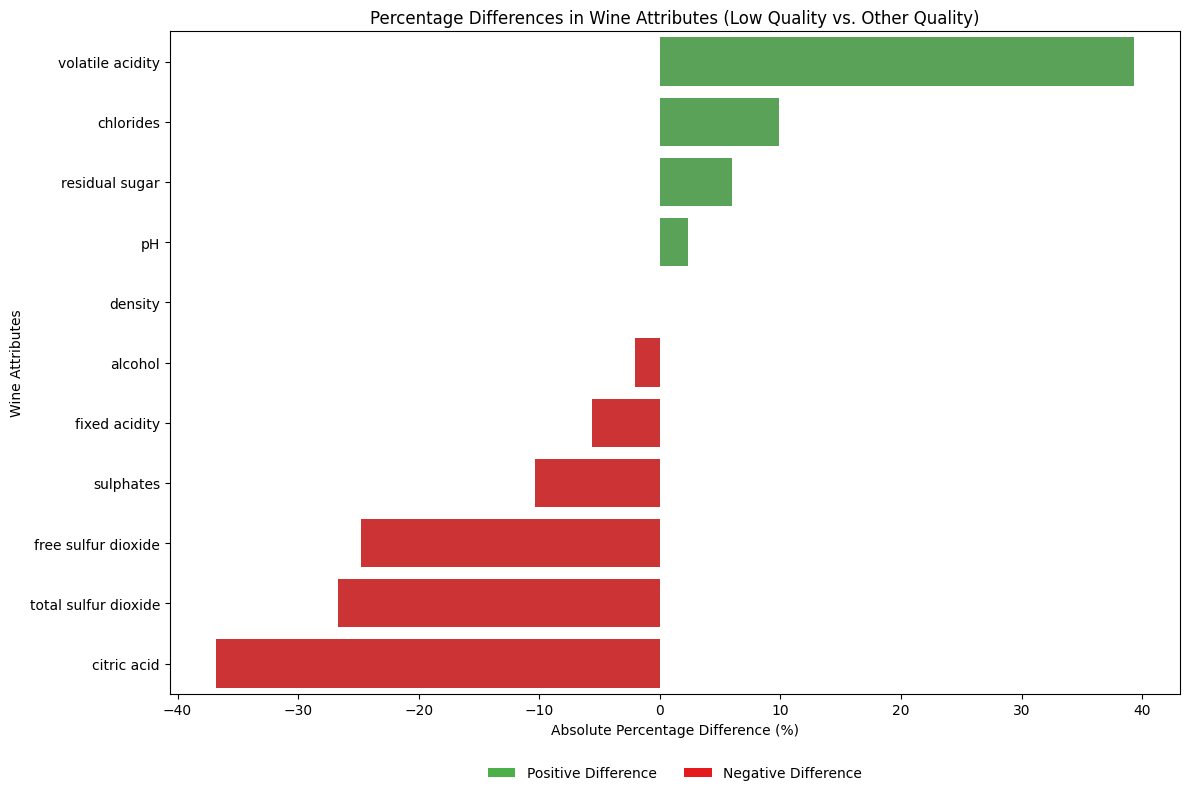

In [10]:
colors = ['#4daf4a' if x > 0 else '#e41a1c' for x in comparison_sorted['Percentage Difference (%)']]
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=comparison_sorted['Percentage Difference (%)'], 
                       y=comparison_sorted.index, 
                       palette=colors)

positive_patch = plt.Rectangle((0,0),1,1,fc="#4daf4a", edgecolor = 'none')
negative_patch = plt.Rectangle((0,0),1,1,fc='#e41a1c', edgecolor = 'none')
l = plt.legend([positive_patch, negative_patch], ['Positive Difference', 'Negative Difference'], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
l.draw_frame(False)

plt.title('Percentage Differences in Wine Attributes (Low Quality vs. Other Quality)')
plt.xlabel('Absolute Percentage Difference (%)')
plt.ylabel('Wine Attributes')
plt.tight_layout()
plt.show()

C:\Users\Marius\AppData\Local\Temp\ipykernel_16112\4214719117.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['quality_label'] == quality_label][column], ax=axes[idx], kde=False, label=quality_label)


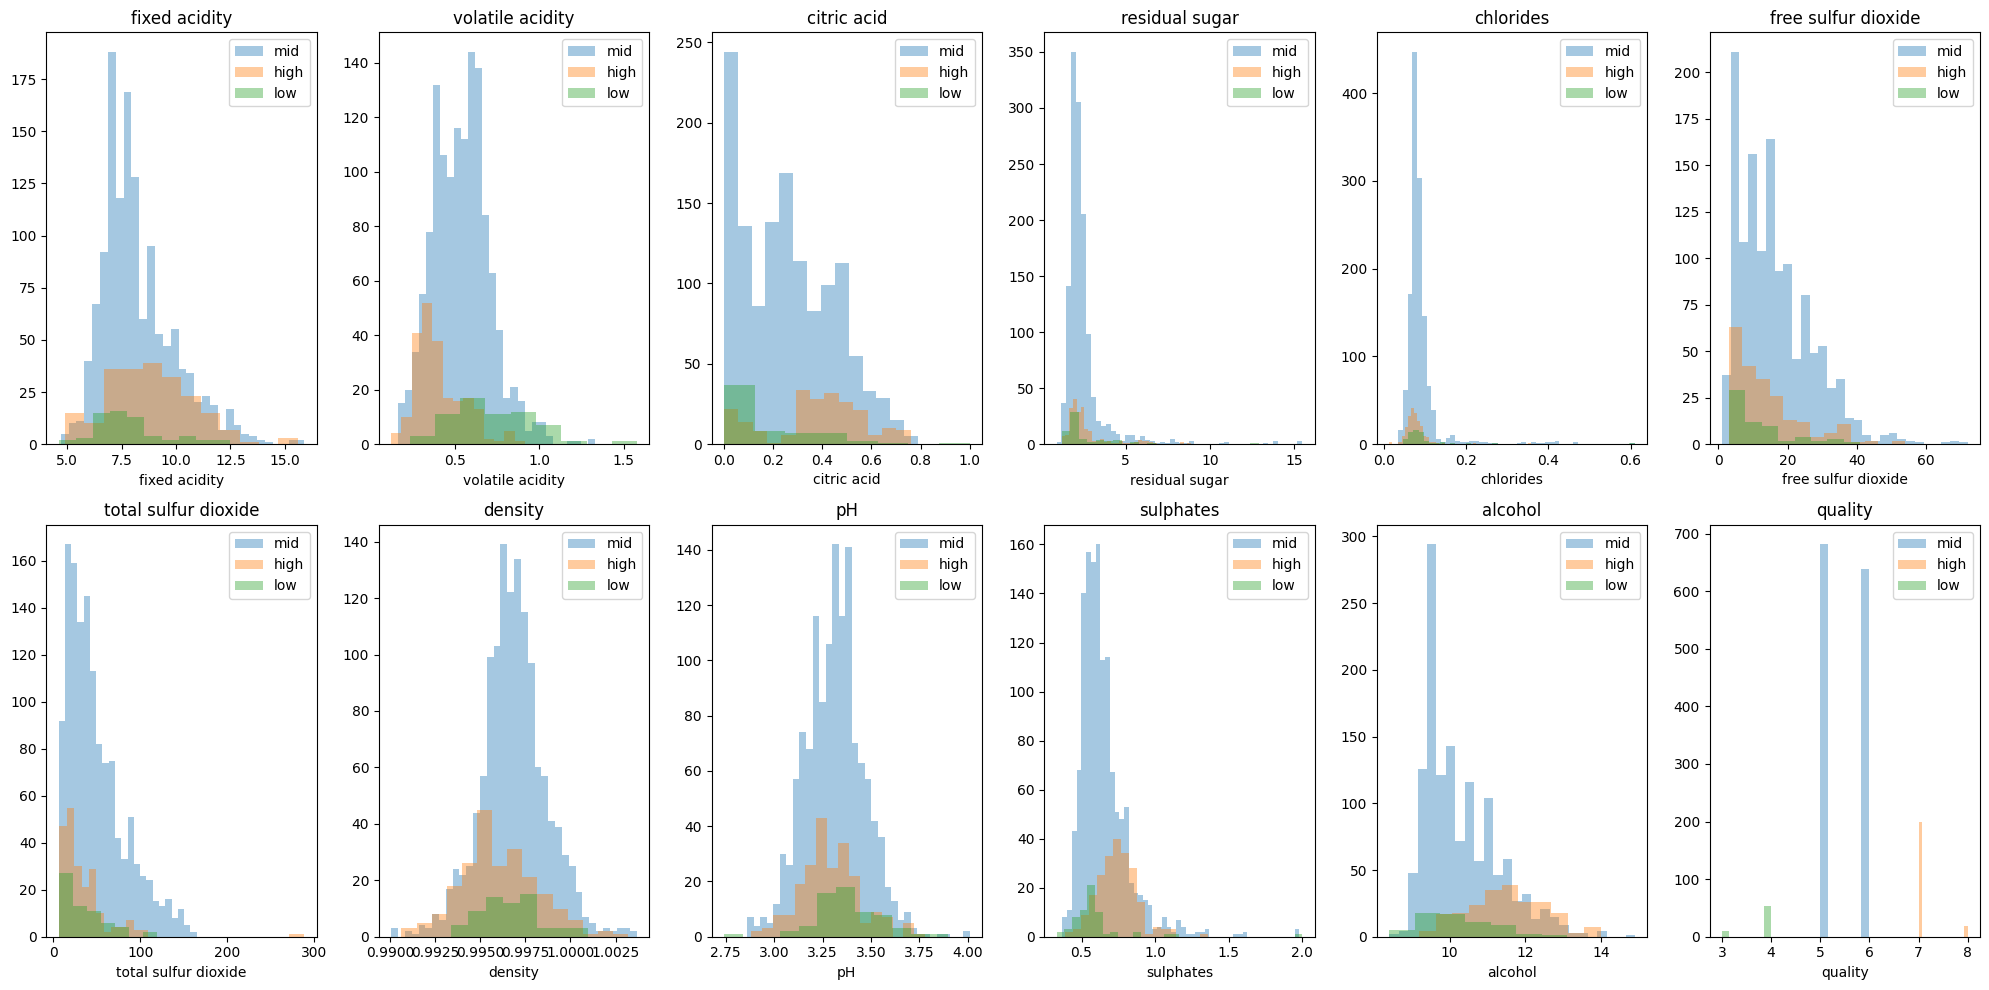

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.ravel()

for idx, column in enumerate(data.columns[:-1]):
    for quality_label in data['quality_label'].unique():
        sns.distplot(data[data['quality_label'] == quality_label][column], ax=axes[idx], kde=False, label=quality_label)
    axes[idx].set_title(column)
    axes[idx].legend()
    
plt.tight_layout()
plt.show()

In [12]:
high_low_quality_wines = data.loc[data['quality_label'] != 'mid']
high_low_quality_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,high
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,high
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,4,low
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,high
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,high
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,high
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,high


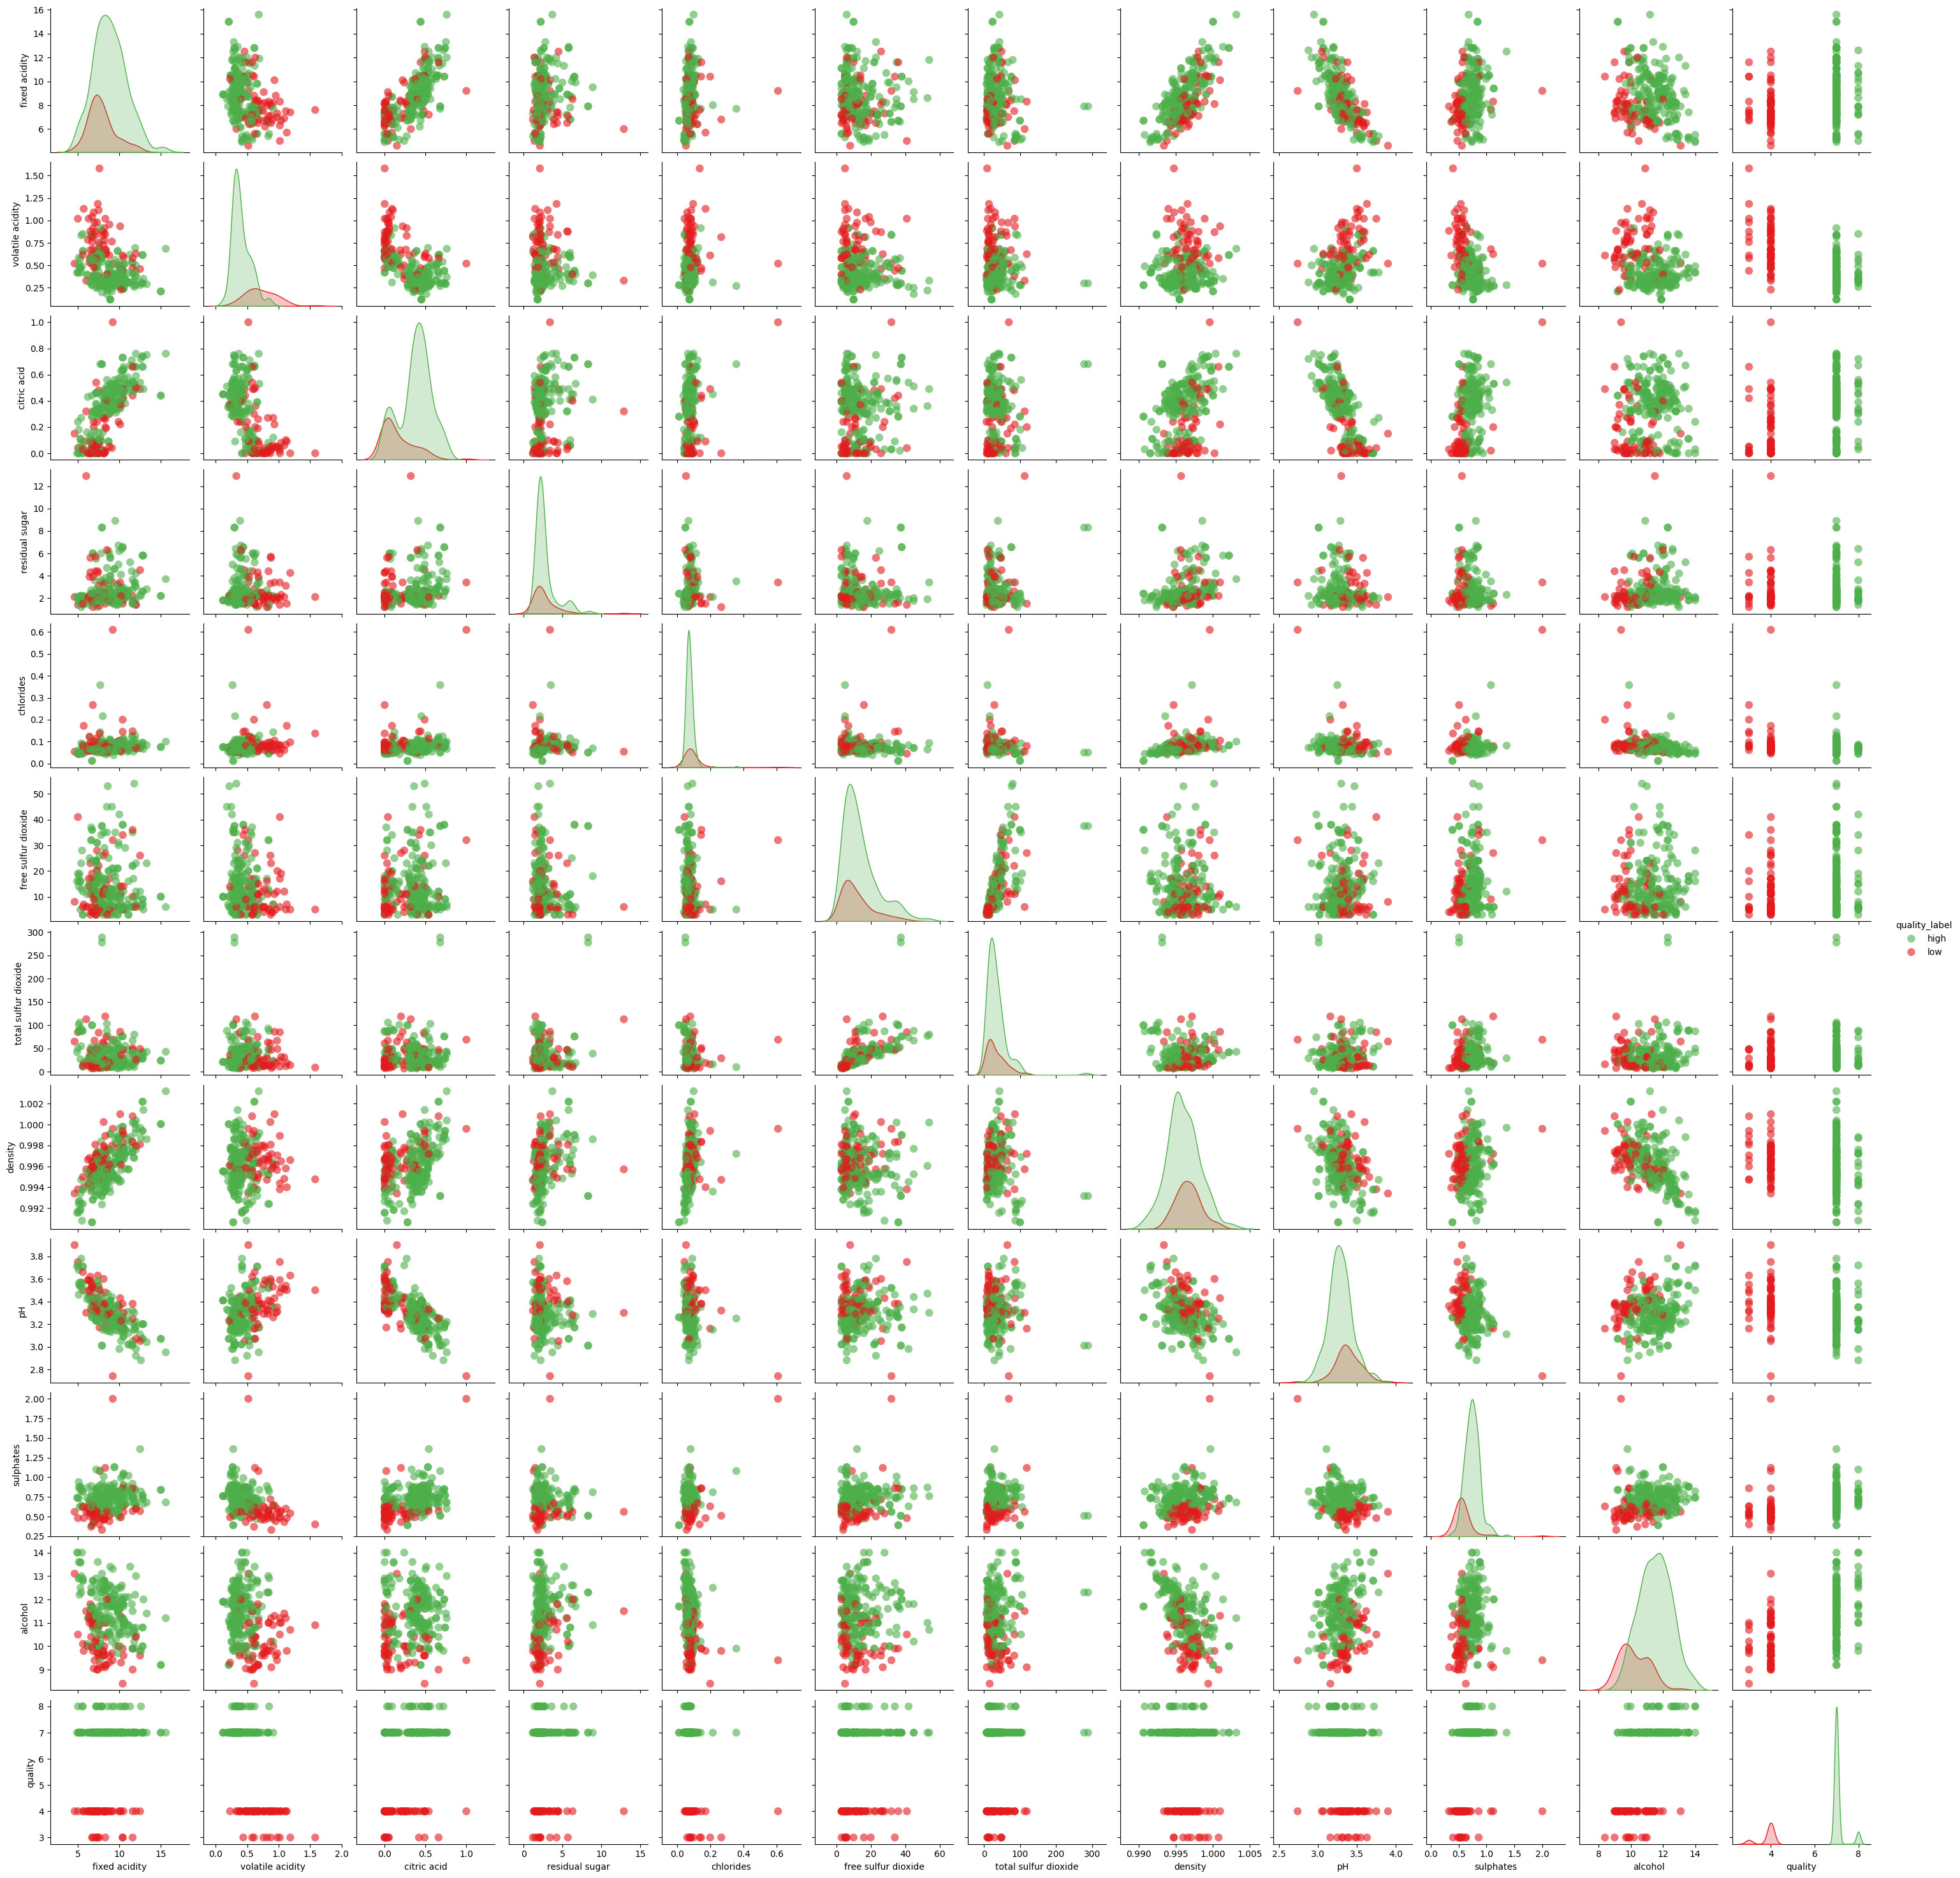

In [13]:
sns.pairplot(high_low_quality_wines, hue='quality_label', palette={ "low": "#e41a1c", "high": "#4daf4a" }, diag_kind='kde', plot_kws=dict(alpha=0.6, s=80, edgecolor='none'))